# Data exploration


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import random_projection
from sklearn.cluster import KMeans
import numpy as np

In [24]:
# wna_data = pd.read_csv('../data/p2_fmt_wNA.csv',sep='\t')
wna_data = pd.read_csv('../data/p5.csv')
# wna_data.iloc[:,2:] = wna_data.iloc[:,2:].add(1).fillna(0) # 填补0并将所有值+1
wna_data

,CHROM,POS,REF,ALT,K10G,K12G,K13G,K16G,K21G,K23G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,EGOHCJCO_00001,174,C,T,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
1,EGOHCJCO_00001,184,C,T,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
2,EGOHCJCO_00003,136,A,G,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,1/1/3/3/3,1/1/1/1/3,1/1/3/3/3,1/1/3/3/3,NA/NA/NA/NA/NA
3,EGOHCJCO_00006,114,T,C,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA
4,EGOHCJCO_00006,297,G,A,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,NA/NA/NA/NA/NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130782,KMKHEIEB_02137,357,G,A,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130783,KMKHEIEB_02144,443,C,T,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130784,KMKHEIEB_02144,471,C,T,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130785,KMKHEIEB_02144,473,C,T,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA


In [25]:
region = pd.read_csv('../data/id_region.txt',sep='\t')
region.head()

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA


In [26]:
wna_data.iloc[:,4:]

,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,K29G,K38G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
1,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,4/4/2/2/2,4/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
2,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,1/1/3/3/3,1/1/1/1/3,1/1/3/3/3,1/1/3/3/3,NA/NA/NA/NA/NA
3,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,2/2/2/2/2,NA/NA/NA/NA/NA
4,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,3/3/3/3/3,NA/NA/NA/NA/NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130782,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130783,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130784,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA
130785,NA/NA/NA/NA/NA,2/2/2/2/2,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,NA/NA/NA/NA/NA,4/4/4/4/4,4/4/4/4/4,4/4/4/4/4,...,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA,NA/NA/NA/NA/NA


In [27]:
# wna_data_1 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[0])
# wna_data_2 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[1])
# wna_data_3 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[2])
# wna_data_4 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[3])
# wna_data_5 = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[4])

for i in range(5):
    tem = wna_data.iloc[:,4:].applymap(lambda x: x.split('/')[i])
    tem.replace('NA','0',inplace=True)
    tem.replace('*','9',inplace=True)
    tem = tem.astype('int')
    tem = np.array(tem).reshape(np.array(tem).shape[0],np.array(tem).shape[1],-1)
    if i == 0:
        wna_data_stack = tem
    else:
        # wna_data_stack = np.stack((wna_data_stack,tem))
        wna_data_stack = np.concatenate((wna_data_stack, tem), axis=2)



In [7]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from tqdm import tqdm

# Define the number of clusters
n_clusters = 5000

# Reshape the data to [130787, 450]
reshaped_data = wna_data_stack.reshape((wna_data_stack.shape[0], -1))

# Create an instance of MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)

# Fit the data to the MiniBatchKMeans model
kmeans.fit(reshaped_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Select one sample from each cluster
sampled_indices = []
for cluster in tqdm(range(n_clusters)):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    if len(cluster_indices) == 0:
        continue
    cluster_data = reshaped_data[cluster_indices]
    distances = kmeans.transform(cluster_data)
    norm_2 = [np.linalg.norm(distance, ord=2) for distance in distances]
    closest_index = np.argmin(norm_2)
    sampled_index = cluster_indices[closest_index]
    sampled_indices.append(sampled_index)

# Get the sampled data
sampled_data = wna_data_stack[sampled_indices]


/Users/houce/anaconda3/envs/torch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 5000/5000 [00:21<00:00, 232.51it/s]


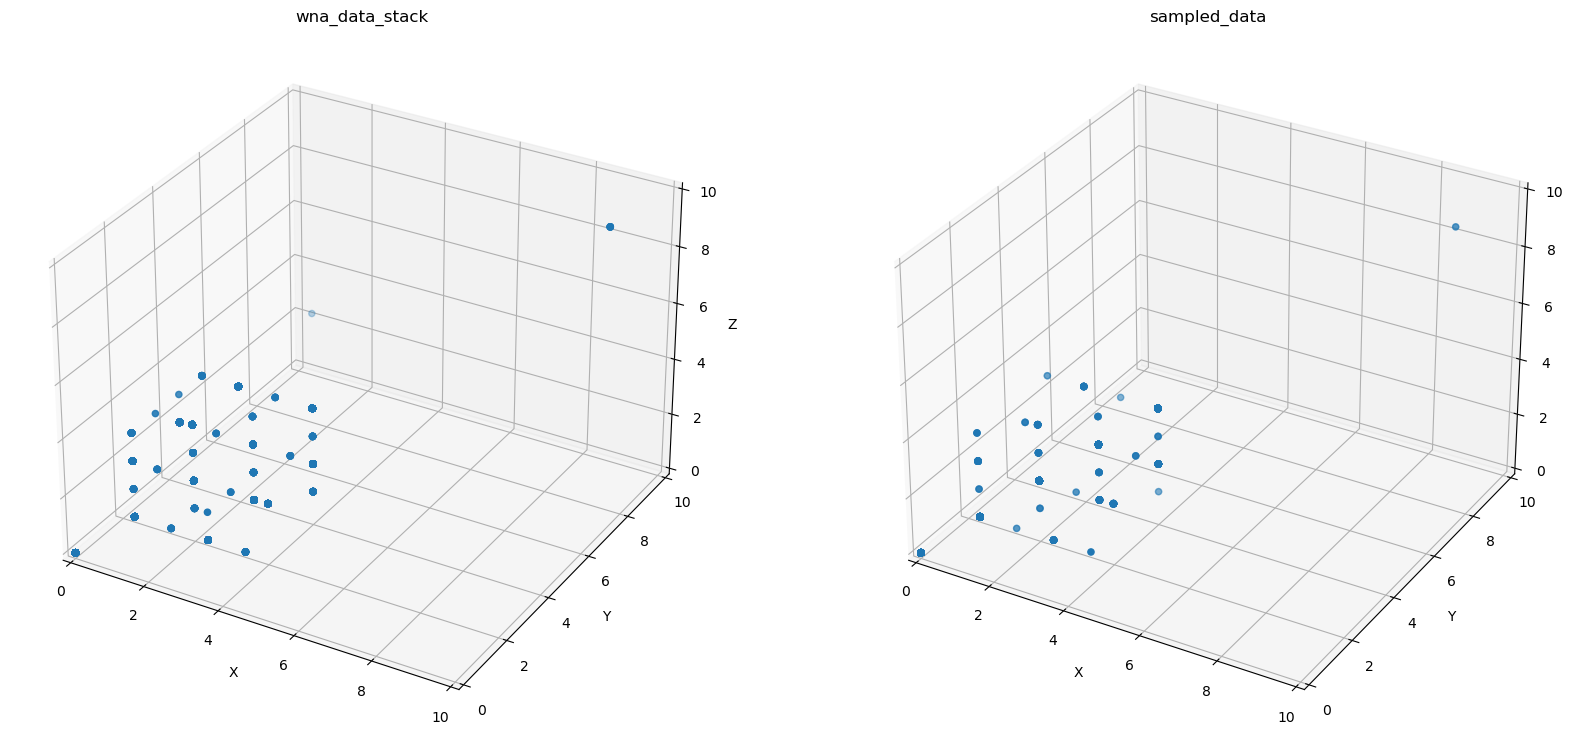

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Visualize wna_data_stack
ax[0].scatter(wna_data_stack[:, 0, 0], wna_data_stack[:, 0, 1], wna_data_stack[:, 0, 2],  label='wna_data_stack')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_zlabel('Z')
ax[0].set_title('wna_data_stack')

# Set the range for the x, y, and z axes in the first subplot
ax[0].set_xlim([0, 10])
ax[0].set_ylim([0, 10])
ax[0].set_zlim([0, 10])

# Visualize sampled_data
ax[1].scatter(sampled_data[:, 0, 0], sampled_data[:, 0, 1], sampled_data[:, 0, 2], label='sampled_data')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_zlabel('Z')
ax[1].set_title('sampled_data')

# Set the range for the x, y, and z axes in the second subplot
ax[1].set_xlim([0, 10])
ax[1].set_ylim([0, 10])
ax[1].set_zlim([0, 10])

# Show the plot
plt.show()


In [48]:
import pandas as pd

# Read the text file and convert it into a dataframe
id_region = pd.read_csv('../data/id_region.txt', sep='\t')

# Display the dataframe
id_region

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA
...,...,...,...
85,metawrap_assemle_2487B,LOG,NorthA
86,metawrap_assemle_2487C,LOG,NorthA
87,metawrap_assemle_2487D,SEM,NorthA
88,metawrap_assemle_2487E,SEM,NorthA


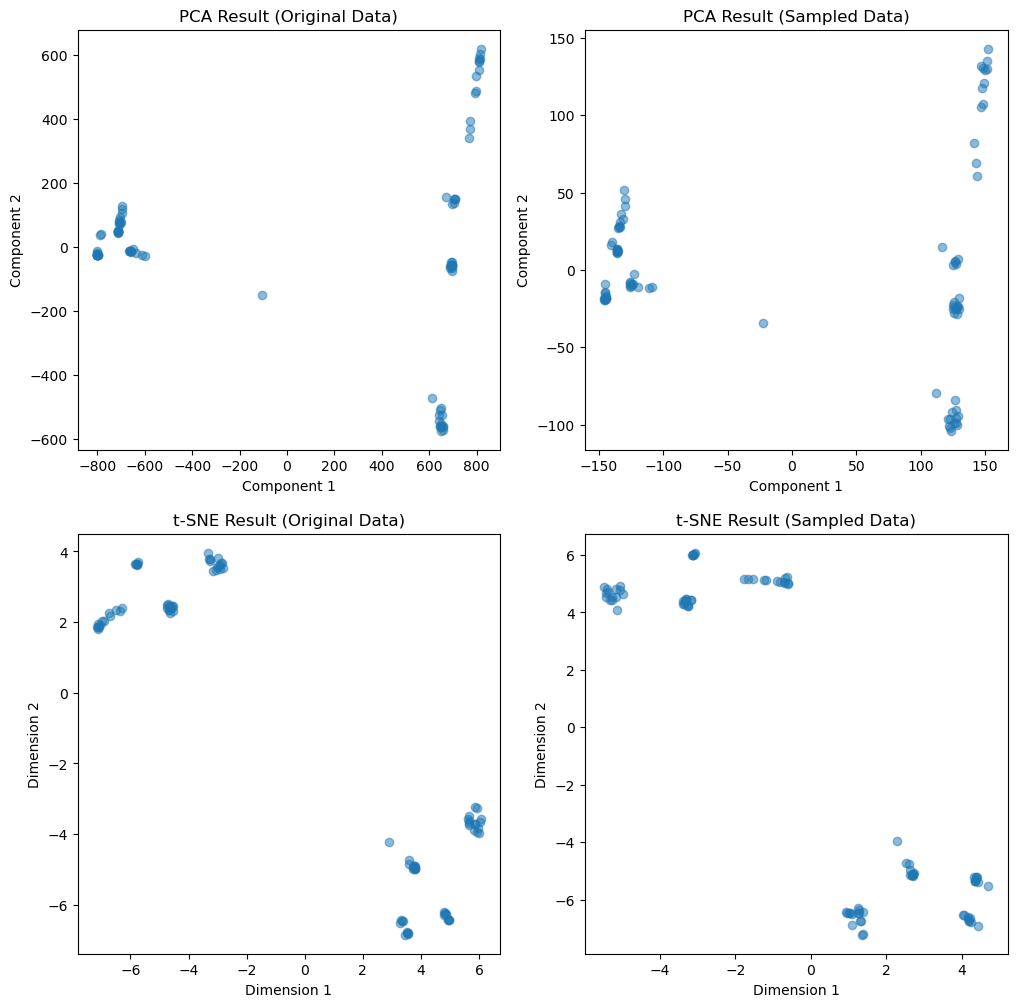

In [56]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12,12))

wna_data_stack_transposed = np.transpose(wna_data_stack, (1, 0, 2))
sampled_data_transposed = np.transpose(sampled_data, (1, 0, 2))

pca = PCA(n_components=2)
original_data_pca = pca.fit_transform(wna_data_stack_transposed.reshape(90, -1))
sampled_data_pca = pca.fit_transform(sampled_data_transposed.reshape(90, -1))

ax[0,0].scatter(original_data_pca[:, 0], original_data_pca[:, 1], alpha=0.5)
ax[0,0].set_title('PCA Result (Original Data)')
ax[0,0].set_xlabel('Component 1')
ax[0,0].set_ylabel('Component 2')

ax[0,1].scatter(sampled_data_pca[:, 0], sampled_data_pca[:, 1], alpha=0.5)
ax[0,1].set_title('PCA Result (Sampled Data)')
ax[0,1].set_xlabel('Component 1')
ax[0,1].set_ylabel('Component 2')

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
original_data_tsne = tsne.fit_transform(wna_data_stack_transposed.reshape(90, -1))
sampled_data_tsne = tsne.fit_transform(sampled_data_transposed.reshape(90, -1))

ax[1,0].scatter(original_data_tsne[:, 0], original_data_tsne[:, 1], alpha=0.5)
ax[1,0].set_title('t-SNE Result (Original Data)')
ax[1,0].set_xlabel('Dimension 1')
ax[1,0].set_ylabel('Dimension 2')

ax[1,1].scatter(sampled_data_tsne[:, 0], sampled_data_tsne[:, 1], alpha=0.5)
ax[1,1].set_title('t-SNE Result (Sampled Data)')
ax[1,1].set_xlabel('Dimension 1')
ax[1,1].set_ylabel('Dimension 2')

plt.show()

/var/folders/wg/cnsrf0z96d31016txljrj2vc0000gn/T/ipykernel_70835/2574133895.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


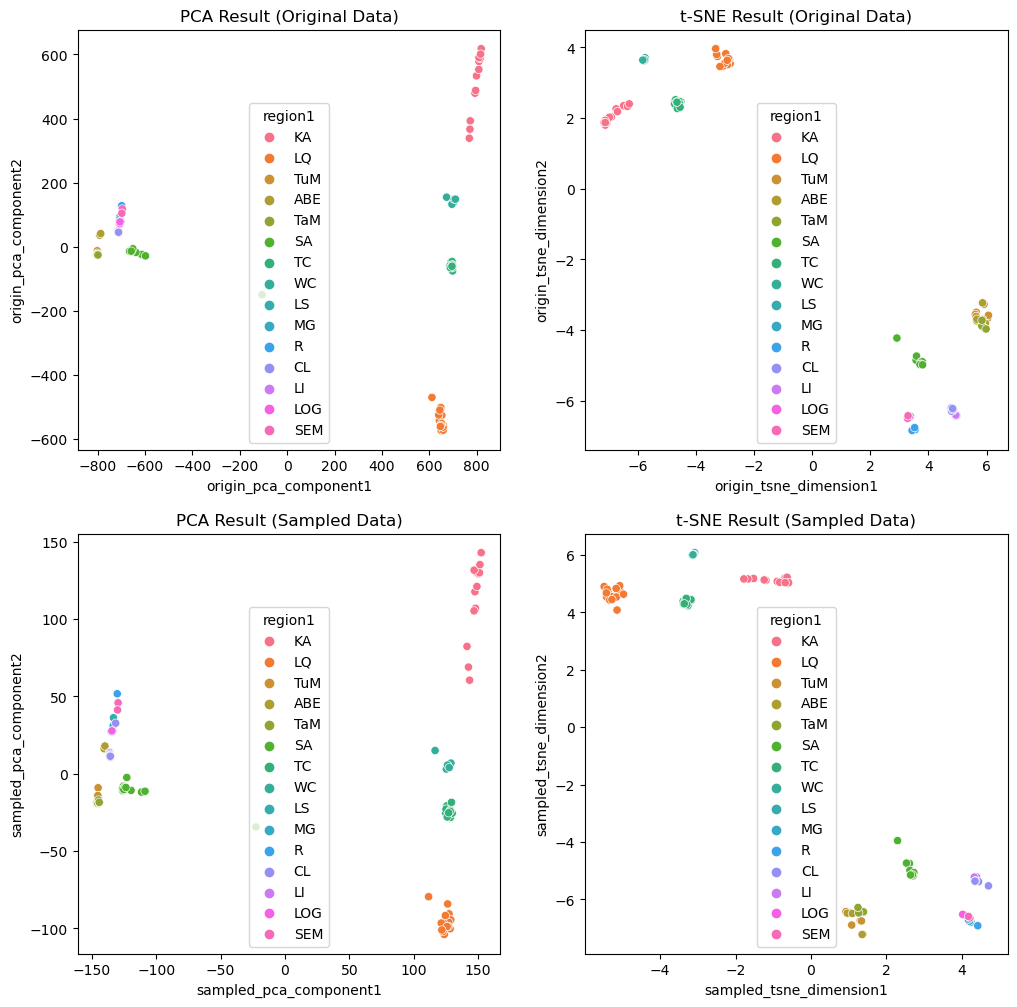

In [58]:
redimensioned_data = pd.concat([id_region,
           pd.DataFrame(original_data_pca,columns=['origin_pca_component1', 'origin_pca_component2']),
           pd.DataFrame(sampled_data_pca,columns=['sampled_pca_component1', 'sampled_pca_component2']),
           pd.DataFrame(original_data_tsne,columns=['origin_tsne_dimension1', 'origin_tsne_dimension2']),
           pd.DataFrame(sampled_data_tsne,columns=['sampled_tsne_dimension1', 'sampled_tsne_dimension2'])
           ],axis=1)

plt, ax = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(data=redimensioned_data, x="origin_pca_component1", y="origin_pca_component2", hue="region1",ax=ax[0,0])
sns.scatterplot(data=redimensioned_data, x="origin_tsne_dimension1", y="origin_tsne_dimension2", hue="region1",ax=ax[0,1])
sns.scatterplot(data=redimensioned_data, x="sampled_pca_component1", y="sampled_pca_component2", hue="region1",ax=ax[1,0])
sns.scatterplot(data=redimensioned_data, x="sampled_tsne_dimension1", y="sampled_tsne_dimension2", hue="region1",ax=ax[1,1])
ax[0,0].set_title('PCA Result (Original Data)')
ax[0,1].set_title('t-SNE Result (Original Data)')
ax[1,0].set_title('PCA Result (Sampled Data)')
ax[1,1].set_title('t-SNE Result (Sampled Data)')
plt.show()

In [49]:
def conduct_pca(data, n_components=2):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data.T)

    cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
    print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

    pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
    sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
    plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
    plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
    return None

conduct_pca(wna_data_stack, n_components=2)
plt.title('PCA - original data')
plt.show()

ValueError: Found array with dim 3. PCA expected <= 2.

In [51]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

input_data = np.random.randn(130787, 90, 5)
reshaped_input = input_data.reshape((130787, 450))

mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu')

# 训练MLP模型
mlp.fit(reshaped_input, reshaped_input)

# 使用MLP模型进行降维
output_data = mlp.predict(reshaped_input)

# 将输出数据从（130787, 450）重塑为（130787, 90）
reshaped_output = output_data.reshape((130787, 90))

 # 计算均方误差（MSE）
mse = mean_squared_error(reshaped_input, reshaped_output)
print("MSE:", mse)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# 计算决定系数（R^2）
r2 = r2_score(reshaped_input, reshaped_output)
print("R^2:", r2)

# 打印输出数据的维度
print(reshaped_output.shape)

ValueError: cannot reshape array of size 58854150 into shape (130787,90)

In [130]:
import numpy as np
import scipy.stats as stats

# data = np.random.choice(wna_data.iloc[:,2:].sum(axis=1),1000,replace=False)
# data = wna_data.iloc[:,2:].sum(axis=1)
data = wna_data.iloc[:,2:]


# 记录原始数据和序号
original_data_with_index = list(enumerate(data.iloc[:,0]))

# 计算经验分布函数 (ECDF) 的值
data_sorted = np.sort(data)
cdf = np.arange(1, len(data) + 1) / len(data)

# 计算正态分布的值
normal_data = stats.norm.ppf(cdf)

# 建立映射关系
mapping_dict = {}
mapping_dict_idx = {}

for (idx, original_value), transformed_value in zip(original_data_with_index, normal_data):
    mapping_dict[(idx, original_value)] = transformed_value
    mapping_dict_idx[idx] = transformed_value

# 打印映射关系的部分数据
print("Mapping Dictionary:")
print({k: mapping_dict[k] for k in list(mapping_dict)[:10]})

Mapping Dictionary:
{(0, 0.0): -4.313499744566735, (1, 0.0): -4.15776195605302, (2, 0.0): -4.06415348342587, (3, 0.0): -3.9965359284656676, (4, 0.0): -3.943368178326786, (5, 0.0): -3.8994430888479874, (6, 0.0): -3.8619551313400096, (7, 0.0): -3.8292157695611646, (8, 0.0): -3.8001281277151793, (9, 0.0): -3.7739385992674377}


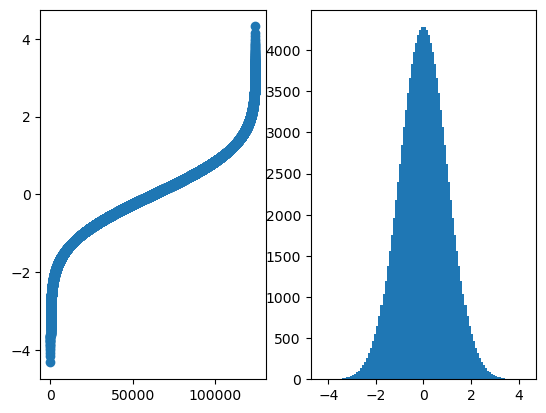

In [134]:
fig,ax = plt.subplots(1,2)
df = pd.DataFrame([mapping_dict_idx]).T.drop(index=len(data)-1)
ax[0].scatter(df.index.values,df.values)
ax[1].hist(df,bins=100)
plt.show()

array([[<Axes: title={'center': '0'}>]], dtype=object)

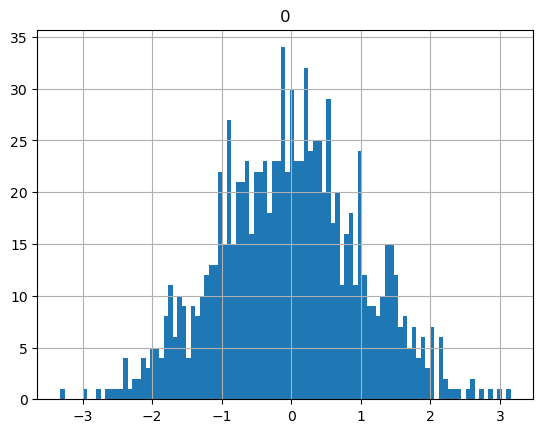

In [156]:
# ramdom sampling
sampled_data = df.sample(1000)
sampled_data.hist(bins=100)

In [151]:
data.iloc[sampled_data.index,:]

,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,K29G,K38G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
93271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34518,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37461,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
118153,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


cumulative variance explained: 62.02%


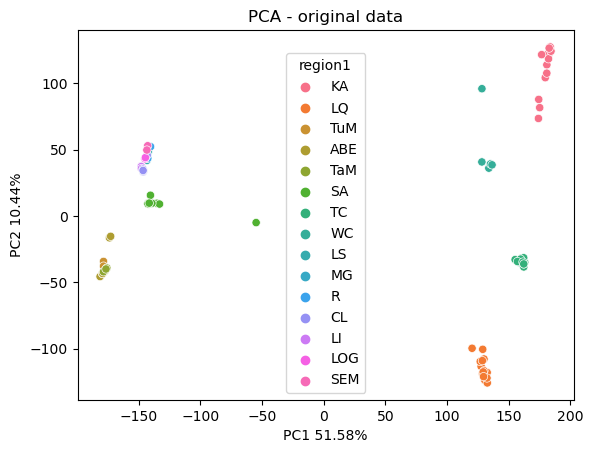

In [152]:
def conduct_pca(data, n_components=2):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data.T)

    cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
    print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

    pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
    sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
    plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
    plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
    return None

conduct_pca(data, n_components=2)
plt.title('PCA - original data')
plt.show()

cumulative variance explained: 62.41%


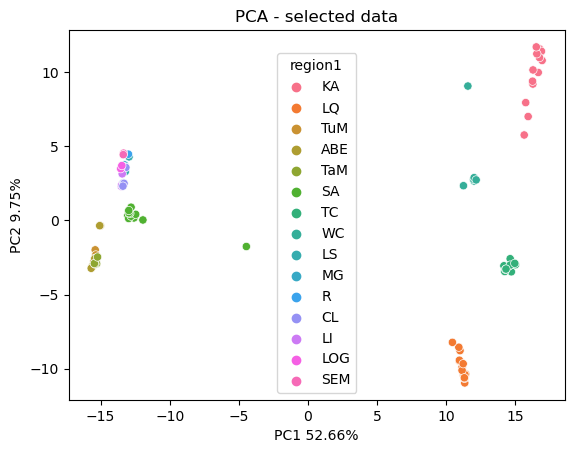

In [157]:
conduct_pca(data.iloc[sampled_data.index,:], n_components=2)
plt.title('PCA - selected data')
plt.show()

In [161]:
wna_data.iloc[sampled_data.index,:].to_csv('./p2_fmt_wNA_sampled.csv',sep='\t')

In [160]:
wna_data.iloc[sampled_data.index,:]

,#CHROM,POS,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
75380,NKKLILLO_01852,710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94742,EIOICPMD_02751,140,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
83356,NJGEAONH_00665,802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17597,LBLMJKHD_00224,762,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27217,LBLMJKHD_00682,3357,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66862,KCEKCIHP_01053,124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2340,EGOHCJCO_00654,1149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
90572,LHMFJDLO_00620,480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50579,LBLMJKHD_02233,472,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KDE

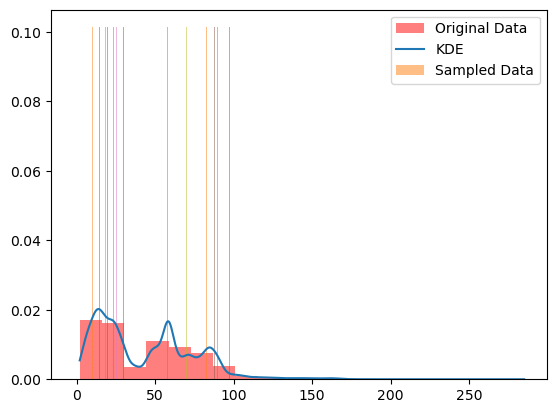

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 生成一些示例数据
np.random.seed(0)
# data = np.concatenate([np.random.randn(1000) - 2, np.random.randn(1000) + 2])
data = wna_data.iloc[:,2:].sum(axis=1).values

# 进行核密度估计
kde = gaussian_kde(data)

# 绘制原始数据的直方图
plt.hist(data, bins=20, density=True, color='r', alpha=0.5, label='Original Data')

# 绘制估计的概率密度函数
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, kde.evaluate(x), label='KDE')

# 从估计的概率密度函数中采样
sampled_data = kde.resample(1000)  # 200是想要采样的数据点数量
plt.hist(sampled_data, bins=20, density=True ,alpha=0.5, label='Sampled Data')

plt.legend()
plt.show()

## 1. sparse PCA


In [88]:
kmeans = KMeans(n_clusters=1000, random_state=0)
kmeans.fit(wna_data.iloc[:,2:])
sampled_data = []

for i in range(1000):
    indices = np.where(kmeans.labels_ == i)[0]
    sampled_index = np.random.choice(indices)
    sampled_data.append(wna_data.iloc[sampled_index,2:])

sampled_data = np.array(sampled_data)

/Users/houce/anaconda3/envs/torch_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
pca = PCA(n_components=90)
pca_result = pca.fit_transform(wna_data.iloc[:,2:].T)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

cumulative variance explained: 100.00%


In [79]:
data = np.array(wna_data.iloc[:,2:])

In [130]:
from scipy.stats import ttest_ind
# 计算均值并进行T检验
mean_X = np.mean(data, axis=0)
mean_X_sampled = np.mean(sampled_data, axis=0)
t, p = ttest_ind(data.astype(float), sampled_data.astype(float))

# 输出检验结果
# print(f"Mean of original data: {mean_X}")
# print(f"Mean of sampled data: {mean_X_sampled}")
print(f"T-value: {t}")
print(f"P-value: {p}")

T-value: [  6.80660415   2.82346277   0.51867074   5.92523474   8.04696769
   4.81080159   6.60862639   5.30663744   6.40254968  -0.63745929
   6.85645285   3.85059929   7.01592773  -5.4895013   -2.39380914
  -1.90870019  -6.37505645  -3.75062534  -4.24168379  -4.68881259
  -4.7214847   -4.88611568  -4.62169304  -4.09422252  -3.66439751
  -4.97298229  -7.80151155 -10.17278275  -8.96643053 -11.91190699
 -10.23577782 -10.93260476  -4.43380449  -4.46941755  -9.98805632
 -10.22671202 -11.10565429 -11.35182379 -11.04393049  -9.8031571
  -9.93951226 -14.90005378 -14.22355654 -13.39610409 -13.076605
 -14.27739891 -14.80303823 -14.19212282 -15.78456795 -12.06226177
  -8.88117211 -14.8399112  -14.88197376  -4.50823151  -3.54103203
  -4.38570752  -4.09191353  -3.9089359   -3.7698625   -3.83256769
  -3.12926415  -3.69247285  -3.5452235   -3.86911374  -3.55653824
  -1.4738775   -3.52061796  -3.04873362   9.66092533  -2.74659595
  -3.57162137  -8.05186011 -10.15317094  -8.11961105  -6.80557721
  -9

In [101]:
from scipy.stats import pearsonr
data = np.array(wna_data.iloc[:,2:])

def corr_cal(data, sampled_data):
    corr_matrix = np.corrcoef(data.T)
    corr_matrix_sampled = np.corrcoef(sampled_data.astype(float).T)
    corr_coef = pearsonr(corr_matrix.flatten(), corr_matrix_sampled.flatten())[0]
    return corr_coef

# 输出相关系数
print(f"Pearson correlation coefficient: {corr_cal(data, sampled_data)}")

Pearson correlation coefficient: 0.836370557080349


In [129]:
random_sampled_idx = np.random.choice(data.shape[0], size=1000, replace=False)
print(f"Pearson correlation coefficient: {corr_cal(data, data[random_sampled_idx])}")
t, p = ttest_ind(data, data[random_sampled_idx])

# 输出检验结果
# print(f"Mean of original data: {mean_X}")
# print(f"Mean of sampled data: {mean_X_sampled}")
# print(f"T-value: {t}")
# print(f"P-value: {p}")

Pearson correlation coefficient: 0.9983818660382677
T-value: [-0.05826086 -0.29563064 -0.23937611 -0.21101781 -0.36660978 -0.24882214
 -0.65594607 -0.82839199 -0.19822549 -1.13942327 -1.1317512  -0.07487845
 -0.98382585  1.06571857  0.66163601  1.03459619  0.55173942  1.3706246
  0.55420615  0.78471186  0.85745108  0.9889169   0.59498787  0.82911798
  0.94340662  0.70021342 -1.14731171 -1.12736228 -0.88737731 -1.29704323
 -1.53424325 -0.93371117 -1.75259061 -1.2392739  -0.93920436 -0.52548108
 -1.00904403 -0.67494242 -0.41840264 -1.22196762 -0.59817956 -0.52918792
 -0.34038071  0.04808328 -0.17242442 -0.07083761 -0.05917865 -0.47442882
 -0.26147179 -0.37638362  0.27984751 -0.09362122 -0.24236093  0.05764778
  0.58265606  0.48902941 -0.03312845  0.45781657 -0.01097433  0.37154058
  0.41979629  0.66624957  0.19185777  0.25439863  0.38951359 -0.4042558
 -0.49180608 -0.81687859 -0.49922761 -0.69667061 -0.12316299  0.25518259
 -0.06960053 -0.05933495  0.18353696  0.77969111  0.30761437  0.3

In [65]:
pca = PCA(n_components=90)
pca_result2 = pca.fit_transform(sampled_data)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

cumulative variance explained: 100.00%


In [140]:
# random projection
# transformer = random_projection.GaussianRandomProjection(n_components=1000)
# wna_data_projected = transformer.fit_transform(wna_data.iloc[:,2:].T)
# print(wna_data_projected.shape) 

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.T)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
plt.title('PCA - original data')

NameError: name 'PCA' is not defined

cumulative variance explained: 51.11%


Text(0.5, 1.0, 'PCA - sampled data')

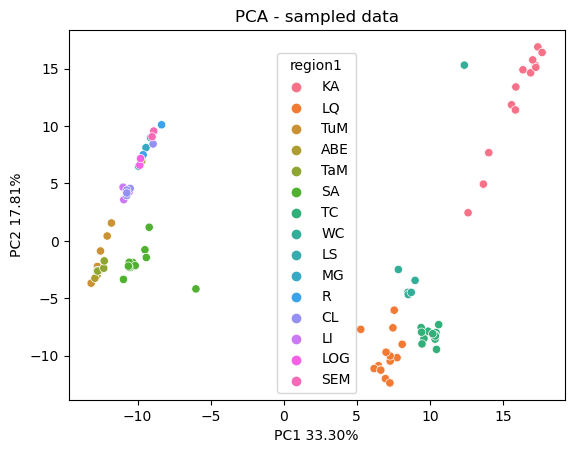

In [149]:
pca = PCA(n_components=2)
# pca_result = pca.fit_transform(data[random_sampled_idx].T)
pca_result = pca.fit_transform(sampled_data.T)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
plt.title('PCA - sampled data')

## 2. importance sampling